<a href="https://colab.research.google.com/github/dhruvohri07-web/Python-housing-project/blob/main/Copy_of_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP 9


```
Dhruv Ohri - M22BBAU0008


*NOTE* NO use of AI generated content has been used to improve the quality of work shown below. All the data and resources used are limited to class discussions to maintain consistency and simplicity of codes.
```


#Importing Required Libraries
 We import necessary libraries including TensorFlow for deep learning, Pandas for data handling, and Scikit-learn for preprocessing and model evaluation along with seaborn for visualization.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, r2_score, confusion_matrix
import matplotlib.pyplot as pltmean sh
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Housing data.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#Data set overview
* Total Entries: 545
* Features: 13
* Target Variables:
1.  price (Regression)
2.   mainroad (Classification - categorical with values "yes" and "no")
* Feature Types:
1. Numerical: price, area, bedrooms, bathrooms, stories, parking
2. Categorical: mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus

# Data Exploration & Visualization

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Text(0.5, 1.0, 'Distribution of House Prices')

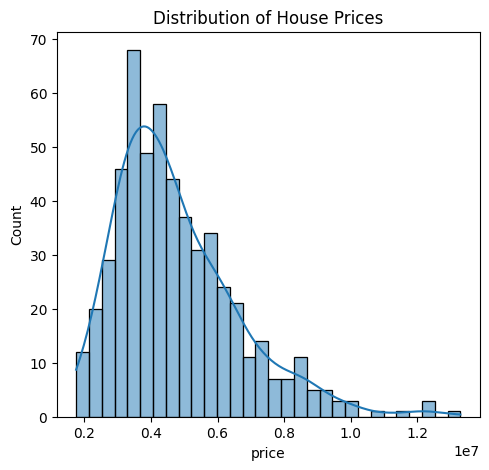

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')

#Key insights
* Right-Skewed: Most houses are in the lower price range, with fewer high-end properties.
* Peak Around 2-3M: The highest frequency of house prices falls in this range.
* Long Right Tail: Some very expensive houses act as outliers.

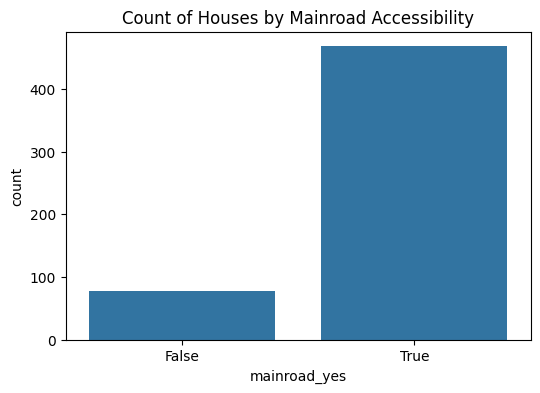

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='mainroad_yes', data=df)
plt.title('Count of Houses by Mainroad Accessibility')
plt.show()

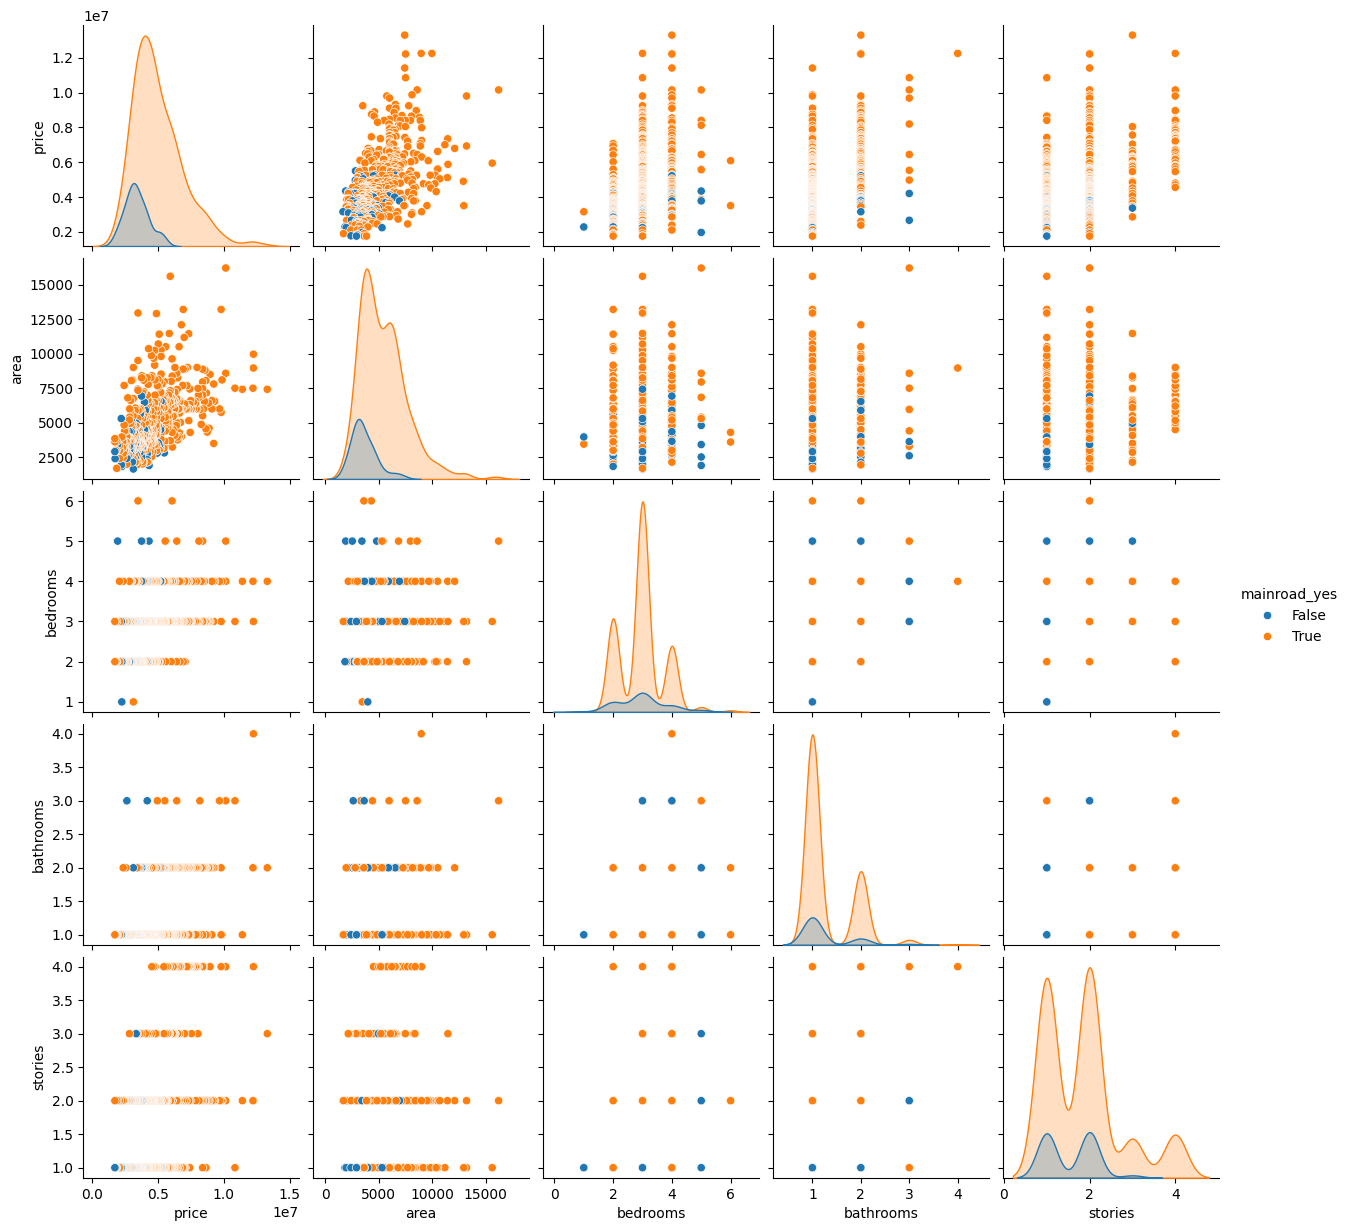

In [ ]:
best_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
sns.pairplot(df, hue='mainroad_yes', vars=best_vars)
plt.show()

#Insights
* Price & Area are Positively Correlated – Larger houses tend to have higher prices.
* Right-Skewed Price Distribution – A few expensive houses dominate the market.
* Main Road Access & Price – Houses with main road access generally have higher prices.
* Categorical Nature of Bedrooms & Bathrooms – These features are discrete rather than continuous.

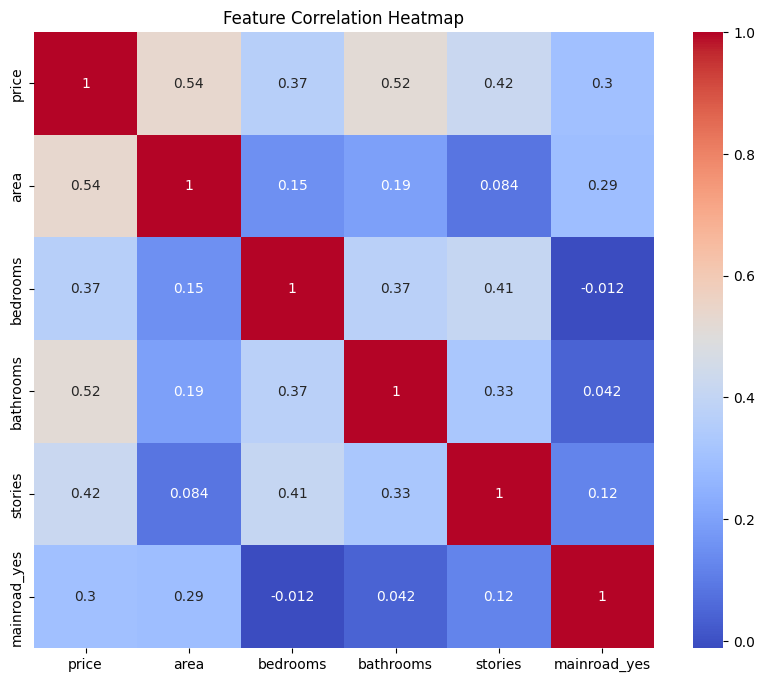

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[best_vars + ['mainroad_yes']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


#Insights
* Price is Most Strongly Correlated with Area (0.54) – Larger houses tend to be more expensive.
* Bathrooms (0.52) and Stories (0.42) also Influence Price – More bathrooms and stories contribute to higher house prices.
* Weak Correlation of Main Road Access with Price (0.30) – While houses with main road access may be more expensive, it's not a major determinant.
* Bedrooms Have Moderate Correlation with Price (0.37) – More bedrooms slightly increase house prices but aren't the strongest factor.

# Data Pre-processing
Proper data preprocessing ensures clean, usable input for machine learning models. This includes handling missing values, encoding categorical features, and normalizing numerical data

In [ ]:
# Split the dataset into features and target variable for regression
x_reg = df.drop('price', axis=1)  # Features for regression
y_reg = df['price']  # Target variable for regression

In [ ]:
# Split the dataset into features and target variable for classification
x_class = df.drop('mainroad_yes', axis=1)  # Features for classification
y_class = df['mainroad_yes']  # Target variable for classification

In [ ]:
# Normalize the feature data
scaler = StandardScaler()  # Initialize the scaler
x_reg = scaler.fit_transform(x_reg)  # Fit and transform the features for regression
x_class = scaler.fit_transform(x_class)  # Fit and transform the features for classification

In [ ]:
# Split the regression dataset into training, validation, and test sets
x_reg_train, x_reg_temp, y_reg_train, y_reg_temp = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)
x_reg_val, x_reg_test, y_reg_val, y_reg_test = train_test_split(x_reg_temp, y_reg_temp, test_size=0.5, random_state=42)

In [ ]:
# Split the classification dataset into training, validation, and test sets
x_class_train, x_class_temp, y_class_train, y_class_temp = train_test_split(x_class, y_class, test_size=0.2, random_state=42)
x_class_val, x_class_test, y_class_val, y_class_test = train_test_split(x_class_temp, y_class_temp, test_size=0.5, random_state=42)

# Regression Model (Price Prediction)

In [ ]:
reg_model = Sequential()
reg_model.add(layers.Dense(128, activation='relu', input_shape=(x_reg_train.shape[1],)))  # Input layer
reg_model.add(layers.Dense(64, activation='relu'))   # Hidden layer 1
reg_model.add(layers.Dense(32, activation='relu'))   # Hidden layer 2
reg_model.add(layers.Dense(16, activation='relu'))   # Hidden layer 3
reg_model.add(layers.Dense(1))  # Output layer (No activation for regression)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
reg_model.fit(x_reg_train, y_reg_train, validation_data=(x_reg_val, y_reg_val), epochs=100, batch_size=32, verbose=2)

Epoch 1/100
14/14 - 1s - 105ms/step - loss: 25234786746368.0000 - mae: 4706526.5000 - val_loss: 30424627675136.0000 - val_mae: 5075906.5000
Epoch 2/100
14/14 - 0s - 8ms/step - loss: 25234765774848.0000 - mae: 4706525.0000 - val_loss: 30424589926400.0000 - val_mae: 5075903.0000
Epoch 3/100
14/14 - 0s - 13ms/step - loss: 25234700763136.0000 - mae: 4706518.5000 - val_loss: 30424485068800.0000 - val_mae: 5075892.0000
Epoch 4/100
14/14 - 0s - 7ms/step - loss: 25234535088128.0000 - mae: 4706501.5000 - val_loss: 30424201953280.0000 - val_mae: 5075865.5000
Epoch 5/100
14/14 - 0s - 7ms/step - loss: 25234105171968.0000 - mae: 4706458.0000 - val_loss: 30423497310208.0000 - val_mae: 5075801.5000
Epoch 6/100
14/14 - 0s - 7ms/step - loss: 25233102733312.0000 - mae: 4706358.5000 - val_loss: 30421934931968.0000 - val_mae: 5075661.0000
Epoch 7/100
14/14 - 0s - 6ms/step - loss: 25230896529408.0000 - mae: 4706147.5000 - val_loss: 30418699026432.0000 - val_mae: 5075375.0000
Epoch 8/100
14/14 - 0s - 11ms/s

In [ ]:
y_reg_pred = reg_model.predict(x_reg_test)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
y_reg_pred = reg_model.predict(x_reg_test)
print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {r2:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test MAE: 1142100.38
Test MSE: 1883855912960.00
Test R² Score: 0.65


# Classification Model (Main road accessibility)

In [ ]:
class_model = Sequential(
    [layers.Dense(128, activation='relu', input_shape=(x_class_train.shape[1],)),
     layers.Dense(64, activation='relu'),
     layers.Dense(1, activation='sigmoid')]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
class_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile with binary crossentropy

In [ ]:
# Train the model
class_model.fit(x_class_train, y_class_train, epochs=200, batch_size=16, validation_data=(x_class_val, y_class_val))  # Fit the model

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7284 - loss: 0.5462 - val_accuracy: 0.9074 - val_loss: 0.2745
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8787 - loss: 0.3253 - val_accuracy: 0.9074 - val_loss: 0.2652
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.2827 - val_accuracy: 0.9074 - val_loss: 0.2534
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8533 - loss: 0.2885 - val_accuracy: 0.9074 - val_loss: 0.2457
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8561 - loss: 0.2833 - val_accuracy: 0.8889 - val_loss: 0.2455
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8710 - loss: 0.2547 - val_accuracy: 0.8889 - val_loss: 0.2487
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9013 - loss: 0.2445 - val_accuracy: 0.8889 - val_loss: 0.2368
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8798 - loss: 0.2421 - val_accuracy: 0.8889 - v

In [ ]:
accuracy = class_model.evaluate(x_class_test, y_class_test) # Evaluate the model


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7123 - loss: 3.7981


In [ ]:
# Evaluate the model on the test set
y_class_pred = class_model.predict(x_class_test)  # Predict the target variable on the test set
y_class_pred = (y_class_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate the classification report
print("Classification Report:")
print(classification_report(y_class_test, y_class_pred))  # Print the classification report

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Classification Report:
              precision    recall  f1-score   support

       False       0.20      0.20      0.20        10
        True       0.82      0.82      0.82        45

    accuracy                           0.71        55
   macro avg       0.51      0.51      0.51        55
weighted avg       0.71      0.71      0.71        55



# Discussion &Findings (values may differ if run again)

1. Checking Data Quality - to ensure the dataset is clean and formatted correctly. It included check for missing values and identify data types

2. Data Processing -
* Converted categorical features into numerical values (pandas / dummy encoding).
* Standardized numerical features using StandardScaler.
* Splitting the data for both models into training,testing and validation for better analysis

# 3. Model Architecture -
#  Regression Model (House Price Prediction)
1. Input Layer: Accepts numerical features, using ReLU activation to introduce non-linearity.
2. Hidden Layers: Reduce dimensionality and capture complex relationships.
3. Output Layer: A single neuron without activation for continuous price prediction.



Training
* optimizer: Adam for adaptive learning.
* Loss Function: Mean Squared Error (MSE) to minimize prediction error.
* Metric: Mean Absolute Error (MAE) to measure deviation from actual prices.
* Epochs: 100 iterations for weight optimization.
* Batch Size: 32 samples per update to balance efficiency and performance.
* Verbose: improves clarity of training

Performance metrics
* R² Score = 0.68 → The model explains 68% of the variance in house prices.
* MAE - 1 Million → On average, the model is off by -$1M in predictions.
* MSE is very large due to squared error, suggesting that extreme values are penalized heavily.

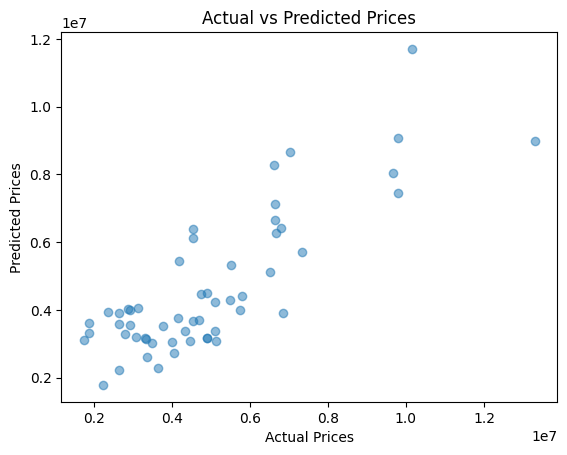

In [ ]:
plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

Observations from the Plot:
* Positive Trend – The predictions generally increase with actual prices, which is a good sign.
* Spread of Points – Some points deviate significantly, meaning the model has errors in higher price ranges.
* Potential Over/Underestimation –
1. Some high-priced houses seem overestimated.
2. Some low/mid-range prices may be underestimated.

# Classification Model (main road access)

* No. of hidden layers dicrease with same activation function relu
* Output Layer: Uses a sigmoid function to classify properties as either having a main road or not.

Training
* Loss Function: Binary Crossentropy, suitable for binary classification.
*Metric: Accuracy to evaluate correct predictions.
* Optimizer: Adam
* Epochs: 200 iterations for convergence.
* Batch Size: 16 samples per update.

Performance metrics
* Accuracy: 76%
* Precision for Yes (Mainroad Present): 0.85
* Recall for Yes: 0.87
* Precision for No (No Mainroad): 0.33
* Recall for No: 0.30

* Insights:
1. The model performs well for predicting properties with a main road.
2. Poor performance for properties without a main road, indicating a class imbalance.

# Conclusion & Future Improvement

In this project, I implemented basic model architectures and relied on manual tuning methods, such as adjusting the number of epochs and batch sizes. While this approach provided a foundational understanding of our model's behavior, we consciously avoided complex hyperparameter tuning strategies to maintain simplicity and focus on core model evaluation. Our results, as depicted in the actual vs. predicted price scatter plot, indicate that while our model captures some trends, there is room for improvement in prediction accuracy and consistency.

# Key Observations from the Model:

* The scatter plot suggests an upward trend, confirming the model's ability to learn relationships within the dataset.However, significant deviations from the ideal prediction line indicate over- or underestimation in various cases.
* The model's performance may be influenced by outliers or insufficient optimization of hyperparameters.

# Steps for Future Improvement: Advanced Hyperparameter Tuning

To enhance our model's accuracy and efficiency, we propose incorporating the following hyperparameter tuning methods:

* Early Stopping: This technique involves monitoring the model's performance on a validation set during training and halting training when performance ceases to improve, thereby preventing overfitting.

* Cross-Validation: This method involves partitioning the data into subsets, training the model on some subsets while validating on others, and rotating through all subsets. This provides a more robust estimate of model performance and helps in selecting optimal hyperparameters.

* Learning Rate Schedules: Adjusting the learning rate during training can lead to better convergence. Techniques like reducing the learning rate when the model's performance plateaus can be beneficial.

By adopting strategies like these, we can significantly improve model accuracy, stability, and computational efficiency. Future iterations should focus on a balance between model complexity and interpretability, ensuring that enhancements contribute to meaningful insights while maintaining practical applicability.

Refrences for Future Improvement
* https://saturncloud.io/blog/how-to-improve-accuracy-in-neural-networks-with-keras/
* https://www.researchgate.net/publication/220674511_Methods_to_improve_prediction_performance_of_ANN_models
* https://www.geeksforgeeks.org/artificial-neural-networks-and-its-applications/
* https://heyzine.com/flip-book/6f1a1b4dc7.html